In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ReferenceElement import *
import os
import imageio
from dg_new_splitting import *

In [13]:
def analytical_u(x,t):
    return np.cos(x-t) + 1/2*np.sin(x+t)
def analytical_p(x,t):
    return np.sin(x-t) + 1/2*np.cos(x+t)
def analytical_q(x,t):
    return -np.sin(x-t)  + 1/2*np.cos(x+t)
N = 8
K = 8
CF = 2.**(-7)
start = 0.
end = 2.*np.pi
a1 = 1.
a2 = -1.
alpha = 0.
h = (end-start)/K
t = 0.

reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h

In [14]:
x = get_x_elements(start,end, K, reference_interval)
dx_min = get_dx_min(x)
dt = CF*dx_min
print(dt)

0.0003075386183559284


In [15]:
t = 0.
t_target = 8.
nt = int((t_target-t)/dt)
u = analytical_u(x,t)
p = analytical_p(x,t)
q = analytical_q(x,t)
print (nt)


26012


In [16]:
# plt.plot(x.flatten(), u.flatten(), label = 'u')
# plt.plot(x.flatten(), p.flatten(), label = 'p')
# plt.plot(x.flatten(), q.flatten(), label = 'q')
# plt.legend()
# plt.ylim(-1.5,1.5)

In [17]:
# direc = "results_2"
# if os.path.isdir(direc):
#     print('Directory'+direc+'already exists')
# else:
#     os.makedirs(direc)
# images = []

In [18]:
for i in range(nt):
    un = u.copy()
    pn = p.copy()
    qn = q.copy()
    u = RK4_Step(dt, du_dt,un,pn,qn,K,N,t,M_inv,M_inv_S,)
    p = RK4_Step(dt, dp_dt,pn,un,qn,K,N,t,M_inv,M_inv_S,False)
    q = RK4_Step(dt, dq_dt,qn,un,pn,K,N,t,M_inv,M_inv_S,False)
    t += dt
#     if i%130 ==0:
#         plt.figure(figsize=(11, 7), dpi=100)
#         for i in range(len(u)):
#             plt.plot(x[i],u[i])
#         plt.plot(x_s,u_go_left(x_s,t),linestyle ='--', label = 'analytical')
#         #plt.plot(x.flatten(), u.flatten(), label = 'u')
#         #plt.plot(x.flatten(), analytical_u(x,t).flatten(), linestyle ='--')
#         plt.ylim(-2,2)
#         plt.title(str(np.round(t,3)))
#         plt.legend()
#         name = direc+"/figure"+str(np.round(t,3))+'.png'
#         plt.savefig(name)
#         images.append(imageio.imread(name))
#         plt.close()
# gifName = direc+'/movie.gif'
# imageio.mimsave(gifName,images)

7.999694540669725


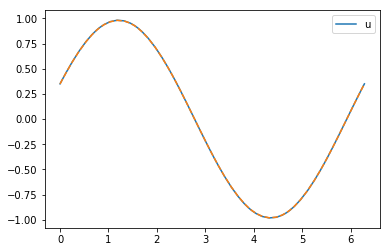

In [19]:
print(t)
plt.plot(x.flatten(), u.flatten(), label = 'u')
plt.plot(x.flatten(), analytical_u(x,t).flatten(), linestyle ='--')
plt.legend()


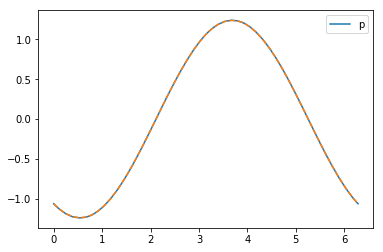

In [20]:
plt.plot(x.flatten(), p.flatten(), label = 'p')
plt.plot(x.flatten(), analytical_p(x,t).flatten(), linestyle ='--')
plt.legend()


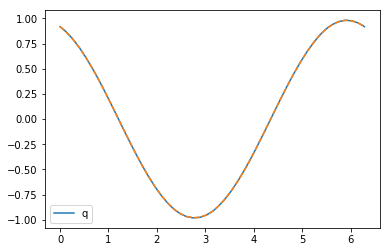

In [21]:
plt.plot(x.flatten(), q.flatten(), label = 'q')
plt.plot(x.flatten(), analytical_q(x,t).flatten(), linestyle ='--')
plt.legend()


In [22]:
t

7.999694540669725

In [23]:
x_s = np.linspace(0,2*np.pi,1001)

In [24]:
def u_go_left(x,t):
    u = 1/2*np.sin(x+t)*np.heaviside(2*np.pi-x-t,1) + np.sin(x-t)*np.heaviside(x-t,1)
    return u

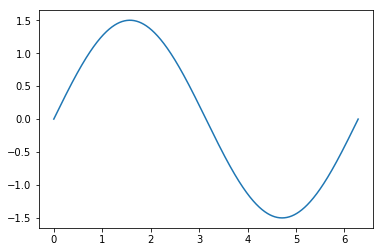

In [25]:
plt.plot(x_s,u_go_left(x_s,0))